<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Affichage les 5 premières lignes de la table
print(population.head())

          Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000

In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population.head())

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau dispo alimentaire comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau dispo alimentaire comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau dispo alimentaire comporte 15605 observation(s) ou article(s)
Le tableau dispo alimentaire comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
dispo_alimentaire.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [11]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head())

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace = True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_a_convertir = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

# Boucle pour convertir les valeurs en Kg
for elt in colonnes_a_convertir: 
    dispo_alimentaire[elt] = dispo_alimentaire[elt] * 1000000

In [14]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head())

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau aide alimentaire comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau aide alimentaire comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau aide alimentaire comporte 1475 observation(s) ou article(s)
Le tableau aide alimentaire comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [17]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [20]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

          Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau sous nutrition comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau sous nutrition comporte {} colonne(s)".format(sous_nutrition.shape[1]))


Le tableau sous nutrition comporte 1218 observation(s) ou article(s)
Le tableau sous nutrition comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [23]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<0.1', 0)
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].astype(float)

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce').fillna(0)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})


In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000


In [28]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# Filtrer la table population pour l'année 2017
population_2017 = population[population['Année'] == 2017]
# Filtrer la table sous_nutrition pour l'année 2017
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']
# Fusionner les tables filtrées
# Cell [114] - Fusionner les tables filtrées
proportion_sous_nutrition = pd.merge(
    population_2017,
    sous_nutrition_2017,
    on='Zone',
    how='left',
    indicator=True  # AJOUT : Ajoute la colonne de vérification
)
print(proportion_sous_nutrition['_merge'].value_counts())

_merge
both          203
left_only      33
right_only      0
Name: count, dtype: int64


In [30]:
#Affichage du dataset
print("Le tableau proportion sous nutrition comporte {} observation(s) ou article(s)".format(proportion_sous_nutrition.shape[0]))
print("Le tableau proportion sous nutrition {} colonne(s)".format(proportion_sous_nutrition.shape[1]))


Le tableau proportion sous nutrition comporte 236 observation(s) ou article(s)
Le tableau proportion sous nutrition 6 colonne(s)


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nombre_personnes_sous_nutrition = proportion_sous_nutrition['sous_nutrition'].sum()
population_mondiale = proportion_sous_nutrition['Population'].sum()
proportion_sous_alim_mondiale = (nombre_personnes_sous_nutrition / population_mondiale) * 100
print(f"La proportion de personnes sous-alimentées dans le monde en 2017 est de {proportion_sous_alim_mondiale:.2f} %.")


La proportion de personnes sous-alimentées dans le monde en 2017 est de 7.10 %.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? Source => 
#2500 kilocalories par jour, Organisation des Nations Unies pour l'alimentation et l'agriculture 


In [62]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_2017 = population[population['Année'] == 2017]
df_merged = pd.merge(
    dispo_alimentaire,
    population_2017,
    on='Zone',
    how='left',
    indicator=True,         # AJOUT : Ajoute la colonne de vérification
    validate='many_to_one'  # AJOUT : Assure qu'on n'a pas deux populations pour le même pays
)

print(df_merged['_merge'].value_counts())

_merge
both          15416
left_only       189
right_only        0
Name: count, dtype: int64


In [34]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_merged['dispo_kcal'] = df_merged['Disponibilité alimentaire (Kcal/personne/jour)'] * df_merged['Population']
dispo_mondiale_kcal = df_merged['dispo_kcal'].sum()


In [35]:
#Calcul du nombre d'humains pouvant être nourris
humains_nourris = dispo_mondiale_kcal / 2500
print(f"Théoriquement, la disponibilité alimentaire mondiale pourrait nourrir {humains_nourris:,.0f} personnes par jour, soit plus de 100% de la population mondial.")

Théoriquement, la disponibilité alimentaire mondiale pourrait nourrir 8,367,593,851 personnes par jour, soit plus de 100% de la population mondial.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [36]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_vegetaux = dispo_alimentaire[dispo_alimentaire['Origine'] == 'vegetale']


In [37]:
#Calcul du nombre de kcal disponible pour les végétaux
df_merged['dispo_kcal'] = df_merged['Disponibilité alimentaire (Kcal/personne/jour)'] * df_merged['Population']
df_vegetaux = df_merged[df_merged['Origine'] == 'vegetale']
dispo_kcal_vegetaux = df_vegetaux['dispo_kcal'].sum()
print(f"La disponibilité énergétique totale pour les végétaux est de : {dispo_kcal_vegetaux:,.0f} Kcal.")


La disponibilité énergétique totale pour les végétaux est de : 17,260,764,211,501 Kcal.


In [38]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
humains_nourris_vegetaux = dispo_kcal_vegetaux /2500
print(f"Théoriquement, la disponibilité alimentaire végétale mondiale pourrait nourrir {humains_nourris_vegetaux:,.0f} personnes par jour.")


Théoriquement, la disponibilité alimentaire végétale mondiale pourrait nourrir 6,904,305,685 personnes par jour.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [39]:
#Calcul de la disponibilité totale
disponibilite_totale = dispo_alimentaire['Disponibilité intérieure'].sum()
disponibilite_totale

np.float64(9848994000000.0)

In [40]:
for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    print("Proportion de", elt, ":", "{:.2f}".format(dispo_alimentaire[elt].sum()*100/disponibilite_totale), "%")

Proportion de Aliments pour animaux : 13.24 %
Proportion de Pertes : 4.61 %
Proportion de Nourriture : 49.51 %
Proportion de Semences : 1.57 %
Proportion de Traitement : 22.38 %
Proportion de Autres Utilisations : 8.78 %


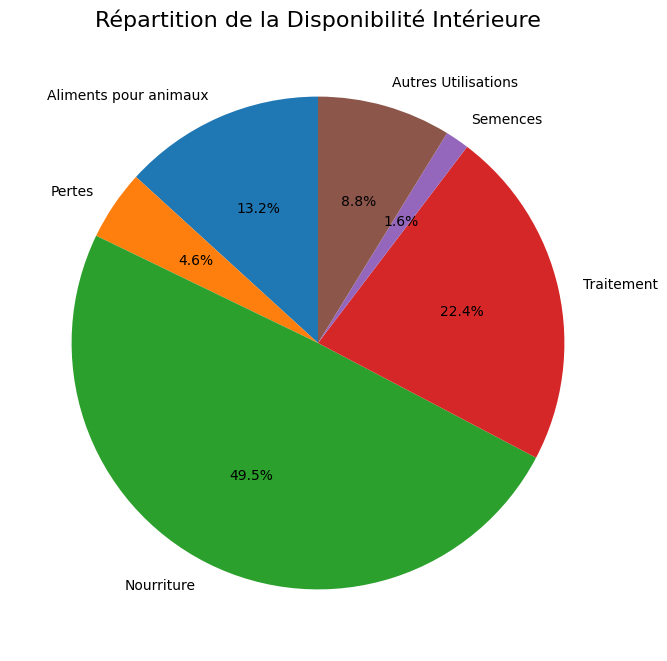

In [41]:
# Créez des listes vides pour stocker les étiquettes et les valeurs
labels = []
values = []

# Liste de toutes les colonnes à analyser, y compris Semences et Traitement
colonnes_principales = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Traitement', 'Semences','Autres Utilisations']

# Utilisez une boucle pour calculer la somme pour chaque catégorie
for colonne in colonnes_principales:
    valeur_totale = dispo_alimentaire[colonne].sum()*100/disponibilite_totale
    labels.append(colonne)
    values.append(valeur_totale)

# Créez le diagramme camembert
plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Répartition de la Disponibilité Intérieure', fontsize=16)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [42]:
#Création d'une liste avec toutes les variables
df_cereales = df_merged[df_merged['Produit'] == 'Céréales']
variables_utilisation = [
    'Aliments pour animaux', 
    'Autres Utilisations', 
    'Disponibilit intérieure', 
    'Exportations - Quantit', 
    'Importations - Quantit',
    'Nourriture',
    'Pertes', 
    'Production',
    'Semences',
    'Traitement',
    'Variation de stock'
]

In [43]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
liste_cereales = [
    'Blé', 'Céréales, Autres', 'Maïs', 'Riz (Eq Blanchi)', 
    'Orge', 'Millet', 'Sorgho', 'Avoine', 'Seigle'
]
df_cereales = df_merged[df_merged['Produit'].isin(liste_cereales)]
print(df_cereales.head())


           Zone           Produit   Origine  Aliments pour animaux  \
7   Afghanistan               Blé  vegetale                    0.0   
12  Afghanistan  Céréales, Autres  vegetale                    0.0   
32  Afghanistan              Maïs  vegetale            200000000.0   
34  Afghanistan            Millet  vegetale                    0.0   
40  Afghanistan              Orge  vegetale            360000000.0   

    Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
7                   0.0                                          1369.0   
12                  0.0                                             0.0   
32                  0.0                                            21.0   
34                  0.0                                             3.0   
40                  0.0                                            26.0   

    Disponibilité alimentaire en quantité (kg/personne/an)  \
7                                              160.23        
12  

In [44]:
#Affichage de la proportion d'alimentation animale
total_aliments_animaux = df_cereales['Aliments pour animaux'].sum()
total_dispo_interieure = df_cereales['Disponibilité intérieure'].sum()
proportion_animaux = (total_aliments_animaux / total_dispo_interieure) * 100
print(f"La proportion de céréales utilisées pour l'alimentation animale est de {proportion_animaux:.2f} %.")


La proportion de céréales utilisées pour l'alimentation animale est de 36.29 %.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [45]:
#Création de la colonne proportion par pays
proportion_sous_nutrition['proportion_sous_alim_par_pays'] = (proportion_sous_nutrition['sous_nutrition'] / proportion_sous_nutrition['Population']) * 100

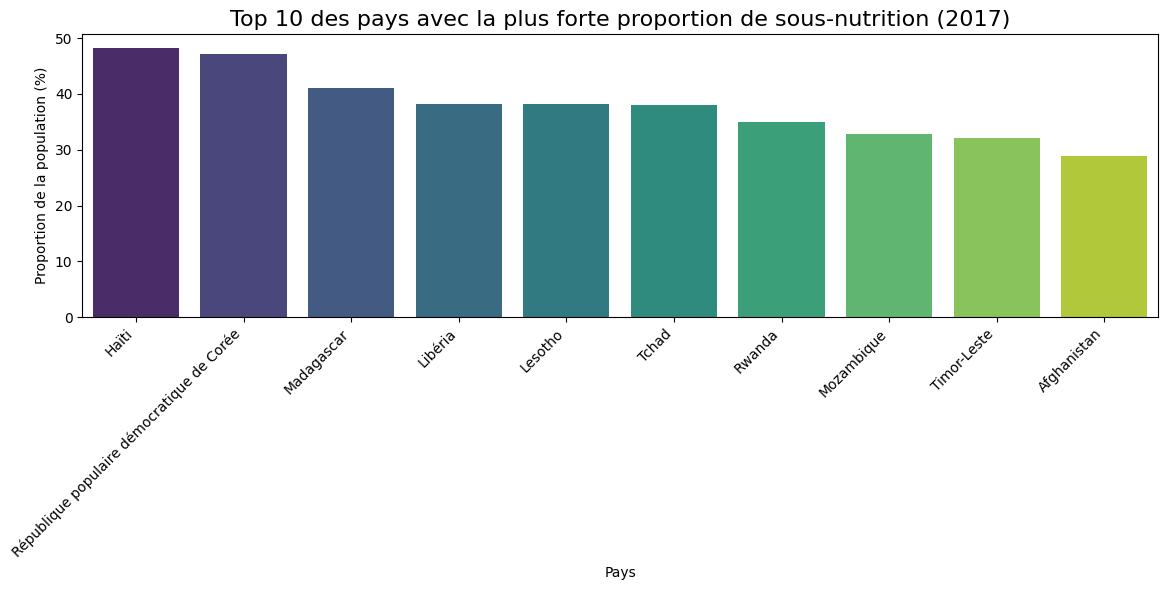

In [46]:
#affichage après trie des 10 pires pays
df_pire_pays_sous_alim = proportion_sous_nutrition.sort_values(by='proportion_sous_alim_par_pays', ascending=False)
# On utilise directement votre tableau déjà trié
df_pour_graphique = df_pire_pays_sous_alim.head(10)

# On crée le graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Zone',
    y='proportion_sous_alim_par_pays',
    data=df_pour_graphique,
    palette='viridis',
    hue='Zone',
    legend=False
)

# On ajoute des titres et des étiquettes pour la clarté
plt.title('Top 10 des pays avec la plus forte proportion de sous-nutrition (2017)', fontsize=16)
plt.xlabel('Pays')
plt.ylabel('Proportion de la population (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [47]:
#calcul du total de l'aide alimentaire par pays
aide_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

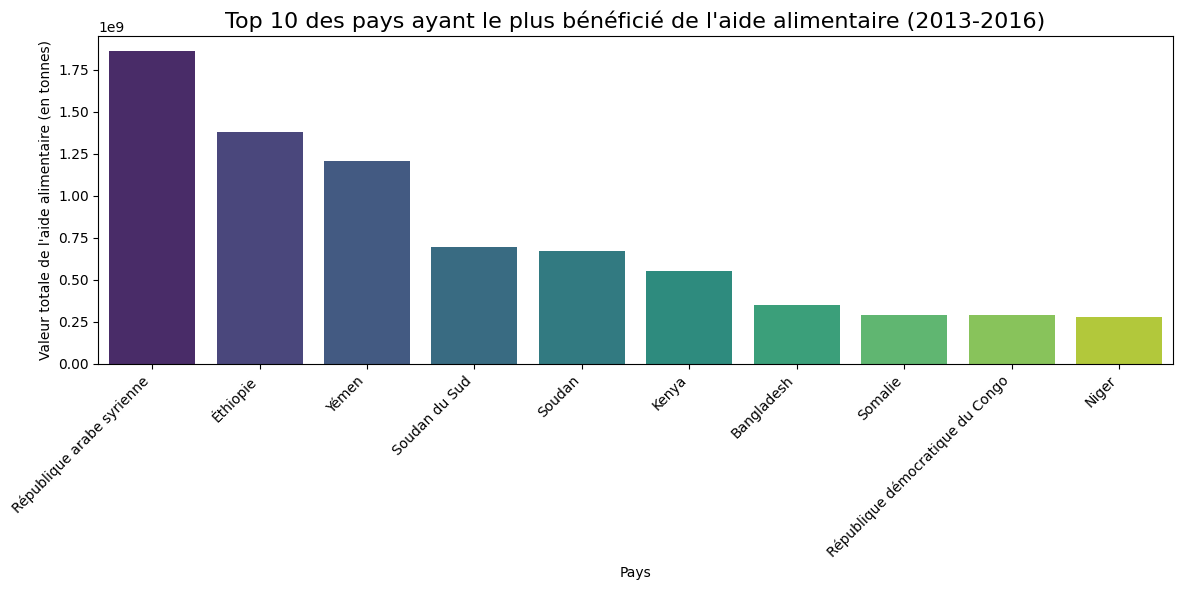

In [48]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_10_beneficiaires = aide_par_pays.sort_values(by='Valeur', ascending=False)
df_pour_graphique = top_10_beneficiaires.head(10)

# On crée le graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Zone',
    y='Valeur',
    data=df_pour_graphique,
    palette='viridis',
    hue='Zone',
    legend=False
)

# On ajoute des titres et des étiquettes pour la clarté
plt.title("Top 10 des pays ayant le plus bénéficié de l'aide alimentaire (2013-2016)", fontsize=16)
plt.xlabel('Pays')
plt.ylabel('Valeur totale de l\'aide alimentaire (en tonnes)')
plt.xticks(rotation=45, ha='right') # On fait pivoter les noms pour qu'ils ne se chevauchent pas
plt.tight_layout() # Ajustement automatique pour ne rien couper
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [49]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_par_annee_par_pays = aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()


In [50]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top_5_beneficiaires = aide_par_pays.sort_values(by='Valeur', ascending=False).head(5)
liste_top_5_pays = top_5_beneficiaires['Zone'].tolist()


In [51]:
#On filtre sur le dataframe avec notre liste
aide_top_5_pays = aide_par_annee_par_pays[aide_par_annee_par_pays['Zone'].isin(liste_top_5_pays)]


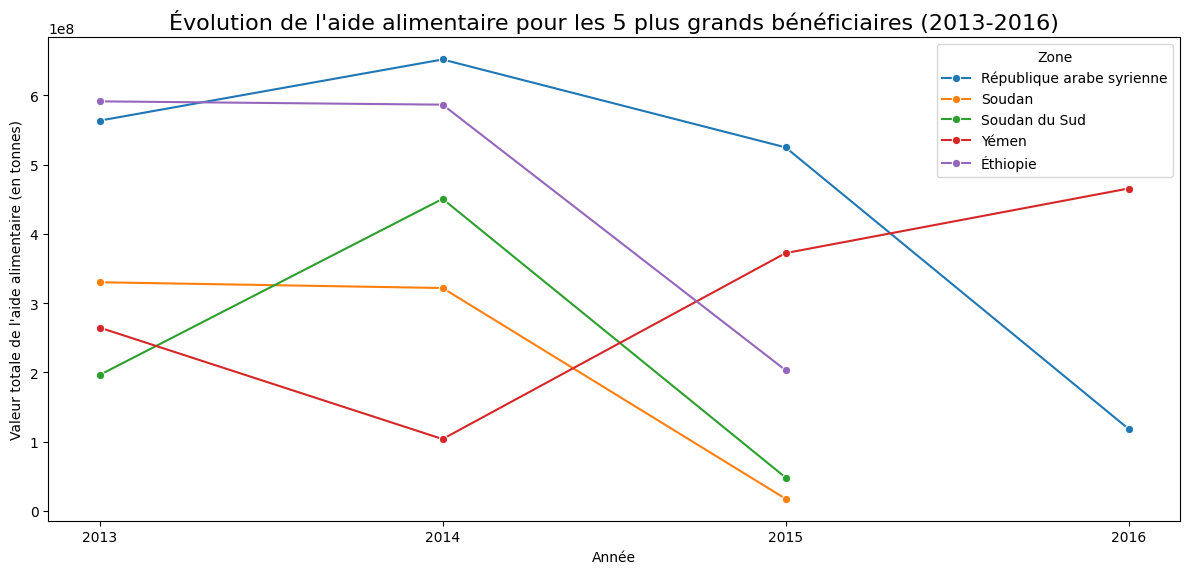

In [52]:
# Affichage des pays avec l'aide alimentaire par année
# On crée le diagramme en lignes
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Année',
    y='Valeur',
    hue='Zone',
    data=aide_top_5_pays,
    marker='o' # Ajoute des points sur les données
)

# On ajoute des titres et des étiquettes pour la clarté
plt.title("Évolution de l'aide alimentaire pour les 5 plus grands bénéficiaires (2013-2016)", fontsize=16)
plt.xlabel('Année')
plt.ylabel('Valeur totale de l\'aide alimentaire (en tonnes)')
plt.xticks(aide_top_5_pays['Année'].unique()) # Affiche toutes les années en entier
plt.tight_layout() # Ajustement automatique pour ne rien couper
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [53]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_par_pays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()


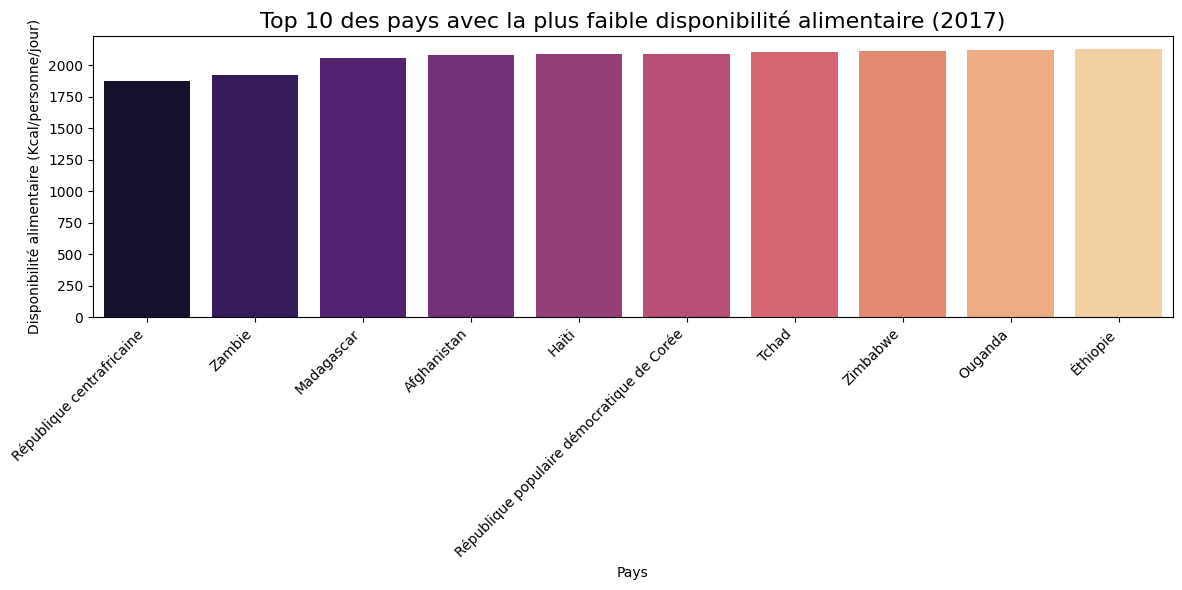

In [54]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
df_moins_de_dispo = dispo_kcal_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
df_pour_graphique = df_moins_de_dispo.head(10)

# On crée le graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Zone',
    y='Disponibilité alimentaire (Kcal/personne/jour)',
    data=df_pour_graphique,
    palette='magma',
    hue='Zone',
    legend=False
)

# On ajoute des titres et des étiquettes pour la clarté
plt.title('Top 10 des pays avec la plus faible disponibilité alimentaire (2017)', fontsize=16)
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation=45, ha='right') # Rotation des noms des pays pour une meilleure lisibilité
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

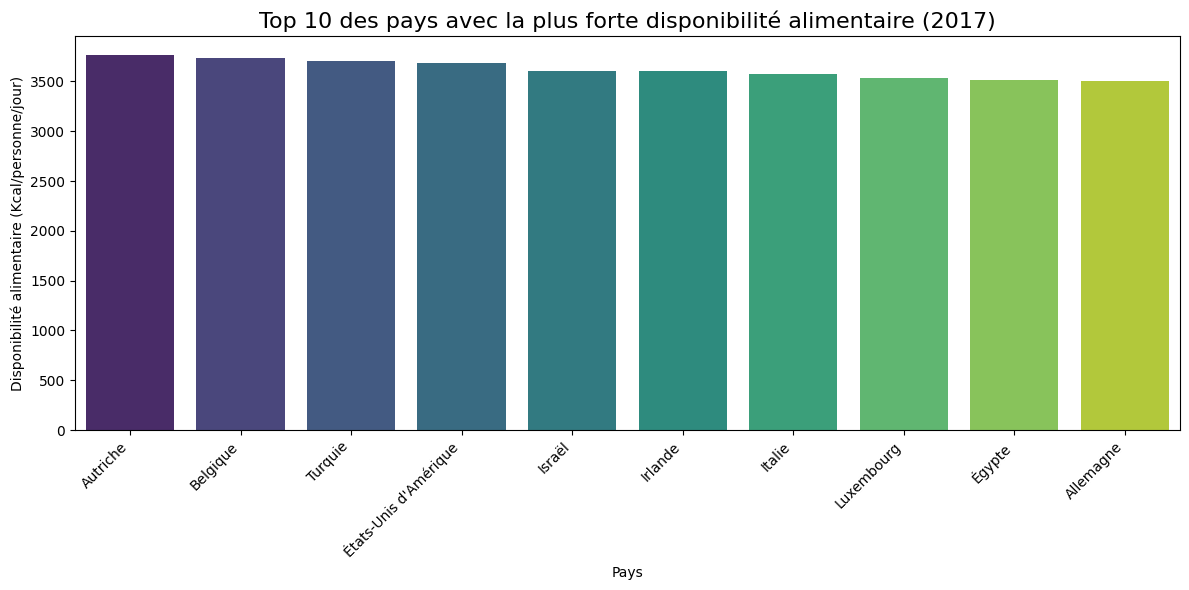

In [55]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
df_plus_de_dispo = dispo_kcal_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
# On sélectionne les 10 premiers pays de votre tableau déjà trié
df_pour_graphique = df_plus_de_dispo.head(10)

# On crée le graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Zone',
    y='Disponibilité alimentaire (Kcal/personne/jour)',
    data=df_pour_graphique,
    palette='viridis',
    hue='Zone',
    legend=False
)

# On ajoute des titres et des étiquettes pour la clarté
plt.title('Top 10 des pays avec la plus forte disponibilité alimentaire (2017)', fontsize=16)
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation=45, ha='right') # Rotation des noms des pays pour une meilleure lisibilité
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [56]:
#création d'un dataframe avec uniquement la Thaïlande 
nom_pays = 'Thaïlande'
df_thailande = df_merged[df_merged['Zone'] == nom_pays]

In [63]:
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']
df_thailande_sous_alim = pd.merge(
    df_thailande,
    sous_nutrition_2017,
    on='Zone',
    how='left',
    indicator='_merge_sousnut'  # CHANGEMENT ICI : Nomme la colonne de vérification différemment
)
print(df_thailande_sous_alim['_merge'].value_counts())
df_thailande_sous_alim['sous_nutrition'] = df_thailande_sous_alim['sous_nutrition'].fillna(0)
total_sous_nutrition_thailande = df_thailande_sous_alim['sous_nutrition'].sum()
population_thailande = df_thailande_sous_alim['Population'].sum()
proportion_sous_alim_thailande = (total_sous_nutrition_thailande / population_thailande) * 100
print(f"La proportion de personnes sous-alimentées en Thaïlande est de : {proportion_sous_alim_thailande:.2f} %.")


_merge
both          95
left_only      0
right_only     0
Name: count, dtype: int64
La proportion de personnes sous-alimentées en Thaïlande est de : 8.96 %.


In [58]:
# Filtrez le DataFrame pour ne garder que la Thaïlande et le manioc
df_thailande_manioc = dispo_alimentaire[
    (dispo_alimentaire['Zone'] == 'Thaïlande') & 
    (dispo_alimentaire['Produit'] == 'Manioc')
]

# Calculez la somme des exportations, de la production et des importations pour ce filtre
total_exportations_thailande_manioc = df_thailande_manioc['Exportations - Quantité'].sum()
total_production_thailande_manioc = df_thailande_manioc['Production'].sum()
total_importations_thailande_manioc = df_thailande_manioc['Importations - Quantité'].sum()

# Appliquez la formule de votre mentor
proportion_exportee_thailande_manioc = (total_exportations_thailande_manioc / (total_production_thailande_manioc + total_importations_thailande_manioc)) * 100

# Affichez le résultat formaté
print(f"La proportion des exportations de manioc par rapport à la disponibilité en Thaïlande est de {proportion_exportee_thailande_manioc:.2f} %.")

La proportion des exportations de manioc par rapport à la disponibilité en Thaïlande est de 80.10 %.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

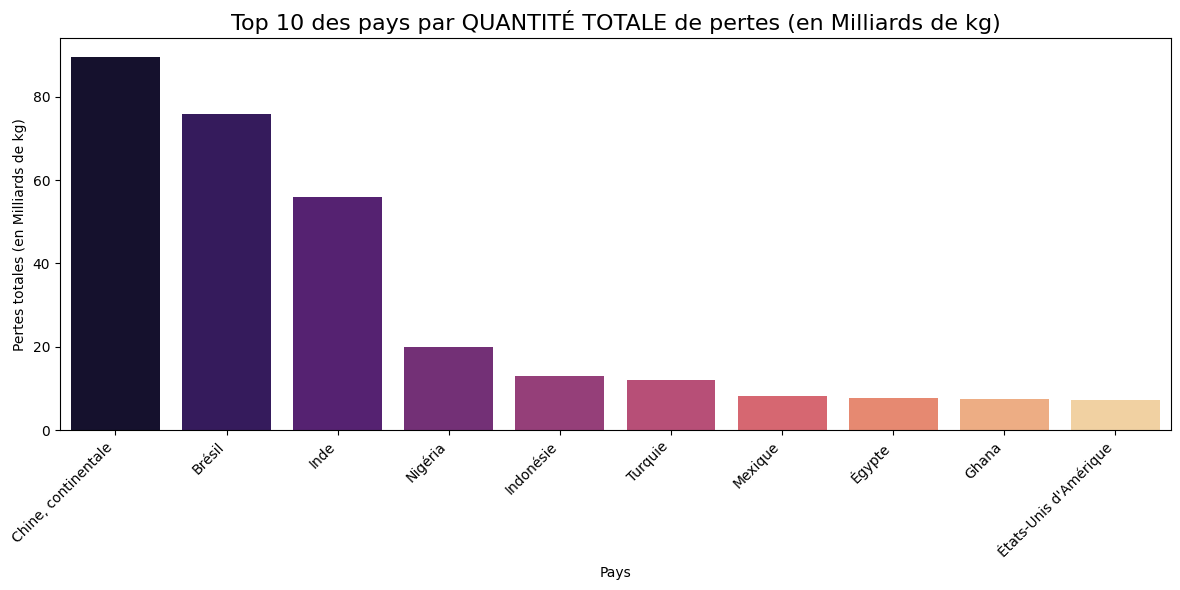

In [60]:
# [MISE À JOUR DU BLOC DE CODE]
# 1. Calculer la somme totale des pertes par pays (Zone)
# On utilise df_merged (créé en Cell [118]) car il contient toutes les infos (Zone, Pertes...)
df_pertes_quantite = df_merged.groupby('Zone')['Pertes'].sum().reset_index()

# 2. Trier pour identifier le top 10 des pays qui perdent le plus
df_pertes_quantite = df_pertes_quantite.sort_values(by='Pertes', ascending=False)
# 1. Calcul du volume des pertes en MILLIARDS DE KG
# (On divise la colonne 'Pertes' (qui est en kg) par 1 milliard)
df_pertes_quantite['Pertes (Milliards de kg)'] = df_pertes_quantite['Pertes'] / 1_000_000_000

# 2. Préparation du Top 10
df_pour_graphique_quantite = df_pertes_quantite.head(10)

# 3. Affichage du graphique mis à jour
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Zone',
    y='Pertes (Milliards de kg)', # Utilisation de la nouvelle colonne
    data=df_pour_graphique_quantite,
    palette='magma',
    hue='Zone',
    legend=False
)
plt.title('Top 10 des pays par QUANTITÉ TOTALE de pertes (en Milliards de kg)', fontsize=16)
plt.xlabel('Pays')
plt.ylabel('Pertes totales (en Milliards de kg)') # Nouvelle étiquette
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

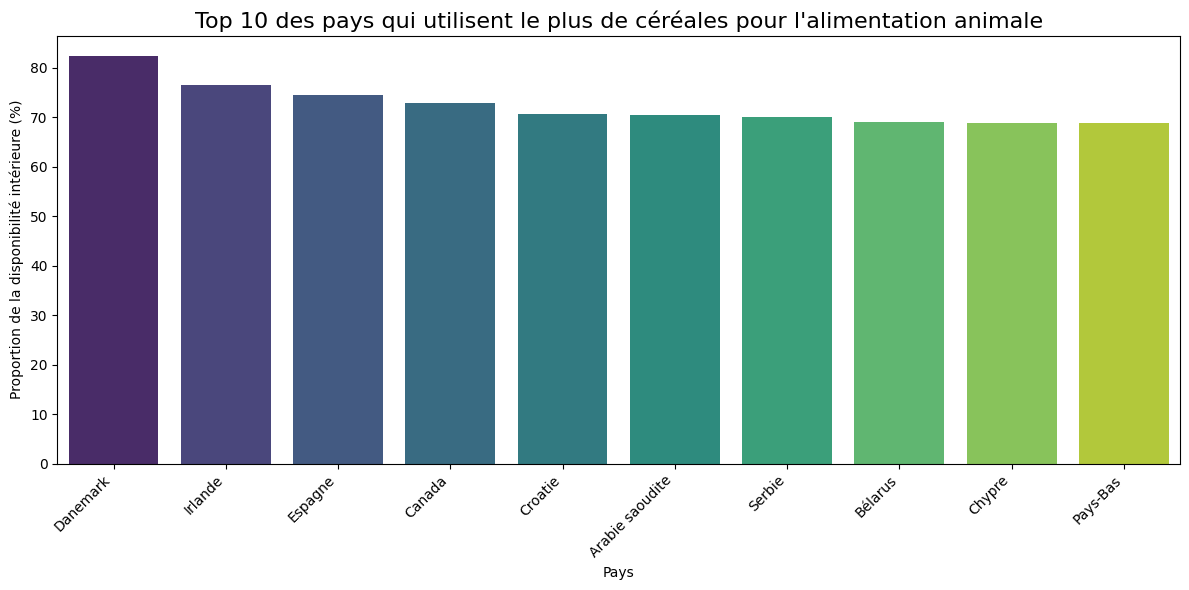

In [61]:
#Pays qui utilisent le plus de céréales pour l'alimentation animale
liste_cereales = [
    'Blé', 'Céréales, Autres', 'Maïs', 'Riz (Eq Blanchi)', 
    'Orge', 'Millet', 'Sorgho', 'Avoine', 'Seigle'
]
df_cereales_par_pays = df_merged[df_merged['Produit'].isin(liste_cereales)]
df_cereales_par_pays = df_cereales_par_pays.groupby('Zone')[['Aliments pour animaux', 'Disponibilité intérieure']].sum().reset_index()
df_cereales_par_pays['proportion_animaux'] = (df_cereales_par_pays['Aliments pour animaux'] / df_cereales_par_pays['Disponibilité intérieure']) * 100
df_cereales_par_pays = df_cereales_par_pays.fillna(0)
df_cereales_par_pays = df_cereales_par_pays.sort_values(by='proportion_animaux', ascending=False)
df_pour_graphique = df_cereales_par_pays.head(10)

# On crée le graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Zone',
    y='proportion_animaux',
    data=df_pour_graphique,
    palette='viridis',
    hue='Zone',
    legend=False
)

# On ajoute des titres et des étiquettes pour la clarté
plt.title("Top 10 des pays qui utilisent le plus de céréales pour l'alimentation animale", fontsize=16)
plt.xlabel('Pays')
plt.ylabel('Proportion de la disponibilité intérieure (%)')
plt.xticks(rotation=45, ha='right') # Rotation des noms des pays pour une meilleure lisibilité
plt.tight_layout()
plt.show()